Análisis exploratorio EDA
Luego de realizar el ETL de los dataset, realizo el análisis exploratorio EDA (Análisis Exploratorio de Datos) 
derivado del ETL Extracción, Transformación y Carga. Vamos adquirir una visión detallada que nos facilitará la toma
de desiciones respecto a las caracteristícas seleccionadas para entener el modelo de recomendación. 

Lo voy a realizar para su mayor eficiencia con los archivos que cree Parquet. 





Imprtamos las Librerías 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq
import warnings
warnings.filterwarnings('ignore')

EDA steam_games.parquet

In [2]:
df_steam = pd.read_parquet("Data/steam_games.parquet")
df_steam.head(2)

,app_name,release_date,price,item_id,developer,release_year,genres_clean
0,Lost Summoner Kitty,2018-01-04 00:00:00.000000000,4.99,761140,Kotoshiro,2018,Action
1,Ironbound,2018-01-04 00:00:00.000000000,0.00,643980,Secret Level SRL,2018,Free to Play


In [3]:
df_steam.info() # obtenemos información de las columnas y sus tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28899 entries, 0 to 28898
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   app_name      28899 non-null  object 
 1   release_date  28899 non-null  object 
 2   price         28899 non-null  float64
 3   item_id       28899 non-null  int64  
 4   developer     28899 non-null  object 
 5   release_year  28899 non-null  int64  
 6   genres_clean  28899 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.5+ MB


In [4]:
df_steam.isnull().sum() # obtenemos la cantidad de valores nulos por columna

app_name        0
release_date    0
price           0
item_id         0
developer       0
release_year    0
genres_clean    0
dtype: int64

Variables categoricas: 
app_name/ item_id/ developer/realse_year/ geners_clean

In [5]:
cantidad_generos= df_steam["genres_clean"].value_counts() # obtenemos la cantidad de juegos por género
cantidad_generos.to_frame

<bound method Series.to_frame of Action                       11273
Casual                        4340
Adventure                     4322
Indie                         3301
Simulation                    1844
Strategy                      1126
RPG                            682
Free to Play                   516
Racing                         454
Design &amp; Illustration      327
Animation &amp; Modeling       179
Pending classification         136
Utilities                       93
Audio Production                79
Sports                          63
Massively Multiplayer           49
Education                       46
Video Production                21
Software Training               21
Web Publishing                   8
Photo Editing                    8
Accounting                       7
Early Access                     4
Name: genres_clean, dtype: int64>

In [8]:
cantidad_generos= df_steam["genres_clean"].value_counts() # obtenemos la cantidad de juegos por género
cantidad_generos.to_frame

<bound method Series.to_frame of Action                       11273
Casual                        4340
Adventure                     4322
Indie                         3301
Simulation                    1844
Strategy                      1126
RPG                            682
Free to Play                   516
Racing                         454
Design &amp; Illustration      327
Animation &amp; Modeling       179
Pending classification         136
Utilities                       93
Audio Production                79
Sports                          63
Massively Multiplayer           49
Education                       46
Video Production                21
Software Training               21
Web Publishing                   8
Photo Editing                    8
Accounting                       7
Early Access                     4
Name: genres_clean, dtype: int64>

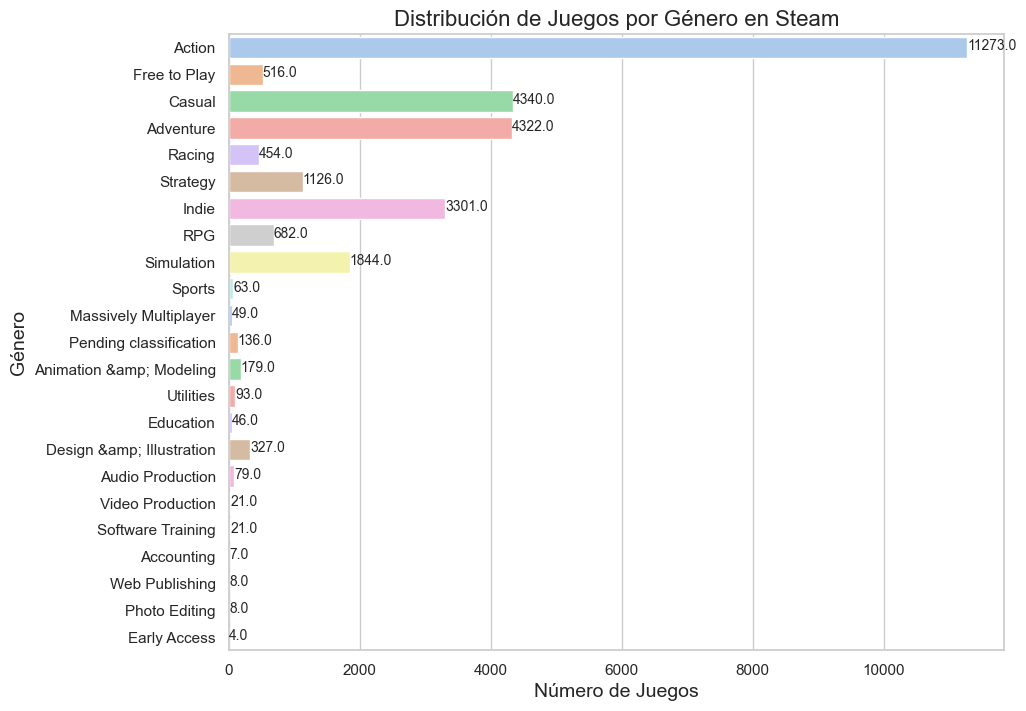

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df_steam, y='genres_clean', orient='h', palette='pastel')

ax.set_title('Distribución de Juegos por Género en Steam', fontsize=16)
ax.set_xlabel('Número de Juegos', fontsize=14)
ax.set_ylabel('Género', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 0.1, p.get_y() + 0.5), fontsize=10)

plt.show()

Observamos que el género de Juegos por Steam, que tienen mayores juegos son: 
Action 
Casula
Adventure
Indie

In [10]:
cantidad_juegos = len(df_steam["item_id"].unique()) # obtenemos la cantidad de software único presente en Steam
cantidad_juegos

28899

Steam posee la cantidad de 28899 productos únicos de software en su catálogo 

In [11]:
lanzamiento_por_anio = df_steam["release_year"].value_counts() # obtenemos la cantidad de juegos por año de lanzamiento
lanzamiento_por_anio

2017    9243
2016    6721
2015    4980
2014    2751
2013    1460
2012    1160
2011     554
2010     409
2009     324
2008     196
2007     150
2006     143
2018     119
2005      92
2003      74
2004      64
2001      59
1998      50
1999      48
2002      42
1997      39
1996      36
2000      36
1994      32
1995      31
1993      25
1992      13
1991      12
1990      10
1989       7
1988       5
1987       4
2019       4
1984       2
1983       1
1986       1
2021       1
1985       1
Name: release_year, dtype: int64

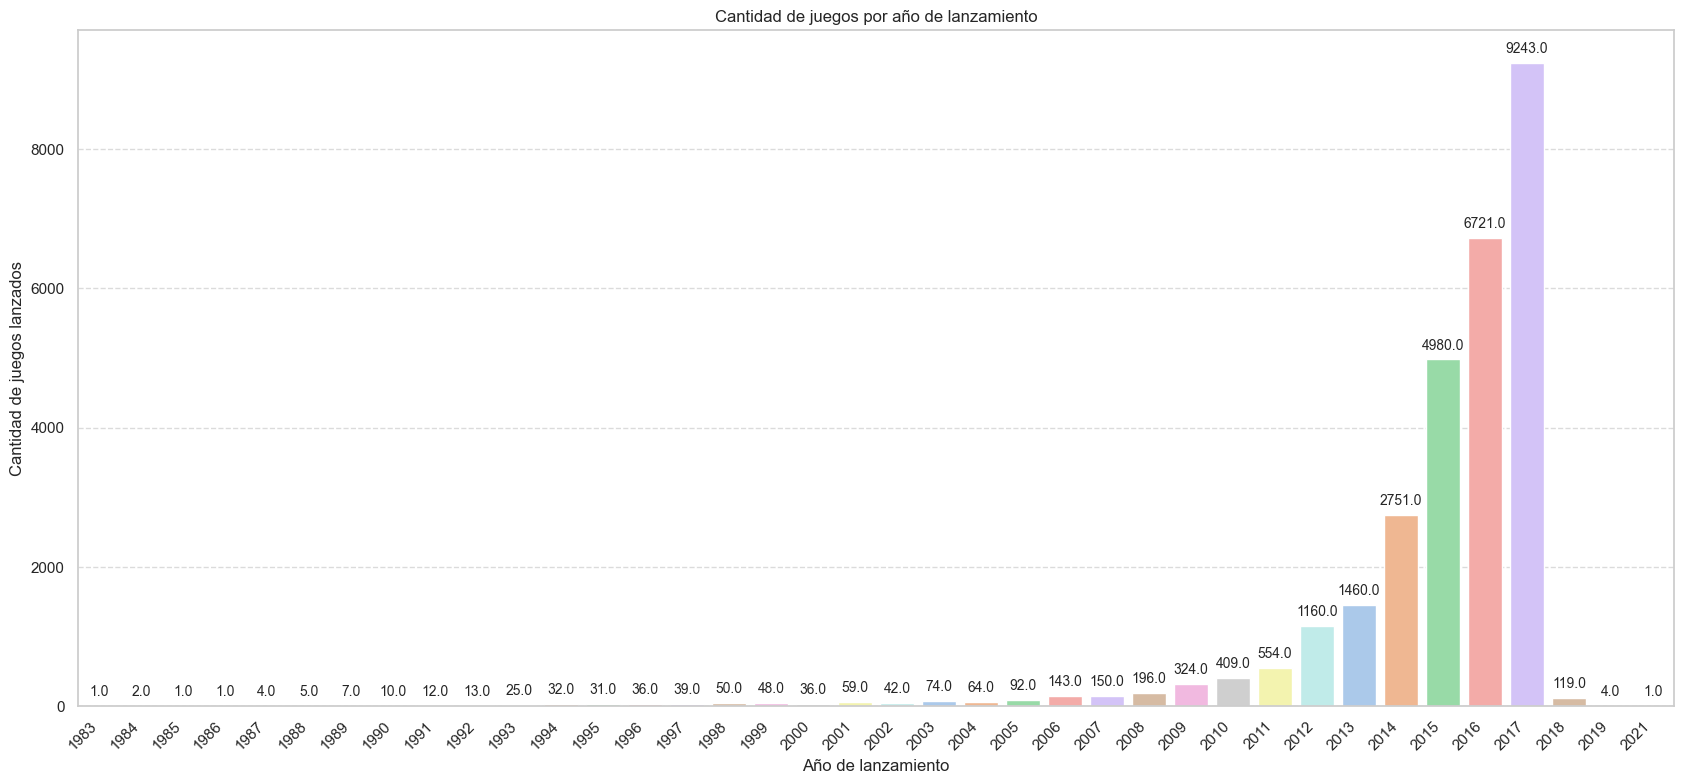

In [12]:
lanzamiento_por_anio = lanzamiento_por_anio.sort_index()

sns.set(style="whitegrid")

plt.figure(figsize=(17, 8))

ax = sns.barplot(x=lanzamiento_por_anio.index, y=lanzamiento_por_anio.values, palette="pastel")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

ax.set(xlabel='Año de lanzamiento', ylabel='Cantidad de juegos lanzados',
       title='Cantidad de juegos por año de lanzamiento')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Steam entro al mercado en el 2003 como una plataforma para la actualización de juegos de Valve. 
En el 2007 amplio su modelo de negocio para incluir software a terceros. Esto explica la baja producción en el 2007. 
A partir de este año se empieza a observar un crecimiento en la cantidad de juegos lanzados anualmente, alcanzando en el 2017 un total de 9243. 


In [13]:
developer = df_steam["developer"].value_counts() # obtenemos la cantidad de juegos por desarrollador
developer

Ubisoft - San Francisco                     1259
SmiteWorks USA, LLC                          813
Dovetail Games                               253
KOEI TECMO GAMES CO., LTD.                   232
Paradox Development Studio                   156
                                            ... 
Salus Games                                    1
Class of  2016-2017                            1
Pirotexnik                                     1
ElVery333,Raquel Covelo Suarez,ATopeCode       1
Bidoniera Games                                1
Name: developer, Length: 11011, dtype: int64

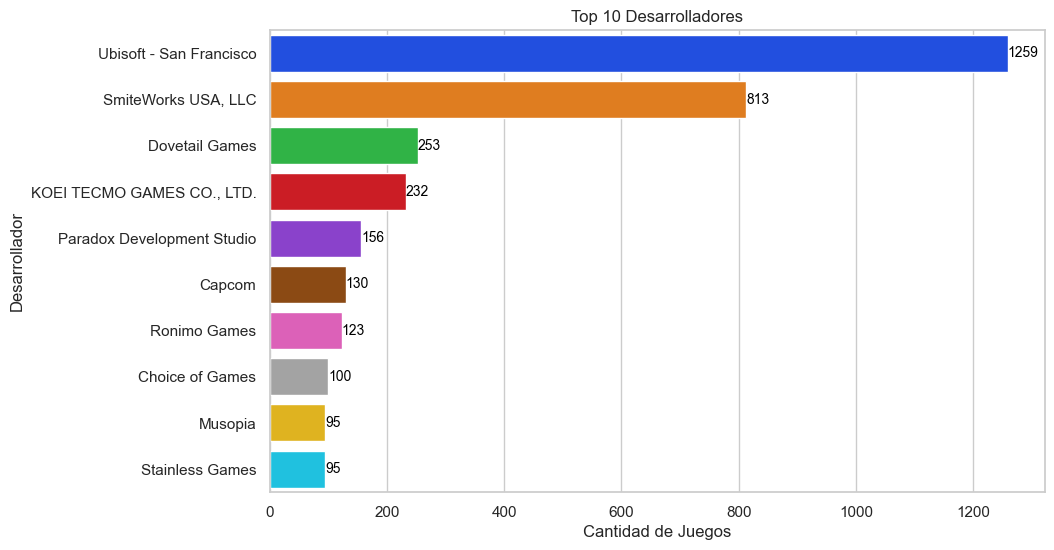

In [14]:
sns.set(style="whitegrid")

# Ajustamos el tamaño del gráfico
plt.figure(figsize=(10, 6))

developer_data = developer[:10]
sns.barplot(x=developer_data.values, y=developer_data.index, palette="bright")
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Desarrollador')
plt.title('Top 10 Desarrolladores')

# Añadimos etiquetas en las barras
for i, v in enumerate(developer_data.values):
    plt.text(v + 0.1, i, str(v), color='black', va='center', fontsize=10)

Se observa que el mayor desarrollador es Ubisft_ San Francisco y lo continua SmiteWorks USA, LLC

EDA user_reviews.parquet

In [15]:
df_reviews = pd.read_parquet("Data/user_reviews.parquet")
df_reviews.head(2)

,user_id,posted,item_id,recommend,posted_year,sentiment_analysis
0,76561197970982479,2011-11-05,1250,True,2011,2
1,76561197970982479,2011-07-15,22200,True,2011,1


In [16]:
df_reviews.info() # obtenemos información de las columnas y sus tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59161 entries, 0 to 59160
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             59161 non-null  object
 1   posted              59161 non-null  object
 2   item_id             59161 non-null  int64 
 3   recommend           59161 non-null  bool  
 4   posted_year         59161 non-null  int64 
 5   sentiment_analysis  59161 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 2.3+ MB


In [17]:
df_reviews.isnull().sum() # obtenemos la cantidad de valores nulos por columna

user_id               0
posted                0
item_id               0
recommend             0
posted_year           0
sentiment_analysis    0
dtype: int64

variables categorícas: 
user_id / recommend/sentiment_analysis

In [18]:
# se contabiliza la cantidad de usuarios de juegos Steam que hay en la plataforma 
cantidad_users= len(df_reviews["user_id"].unique())
cantidad_users

25467

Son los usuarios únicos en el dataset 25467

Se cuenta las Recomendaciones 

In [19]:
cant_recomend= df_reviews["recommend"].value_counts()
cant_recomend

True     52350
False     6811
Name: recommend, dtype: int64

Se observa que hay 52350, se ve que los usuarios hacen una cantidad de reviews 

Conteo de las categorias de Sentimiento

In [20]:
#realizo el conteo de cada una de las categorias de sentimientos
cant_sent= df_reviews["sentiment_analysis"].value_counts()
cant_sent

2    32181
1    22000
0     4980
Name: sentiment_analysis, dtype: int64

Observamos: 
La cantidad de reviews de sentimientos positivos son : 32181
La cantidad de reviews de sentimientos neutrales son : 22000
La cantidad de reviews de sentimientos negativos son: 4980

Variables númericas: 
Año que se realizaron los reviws

In [21]:
fecha=df_reviews["posted_year"].describe()
fecha

count    59161.000000
mean      2013.935464
std          1.094145
min       2010.000000
25%       2014.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: posted_year, dtype: float64

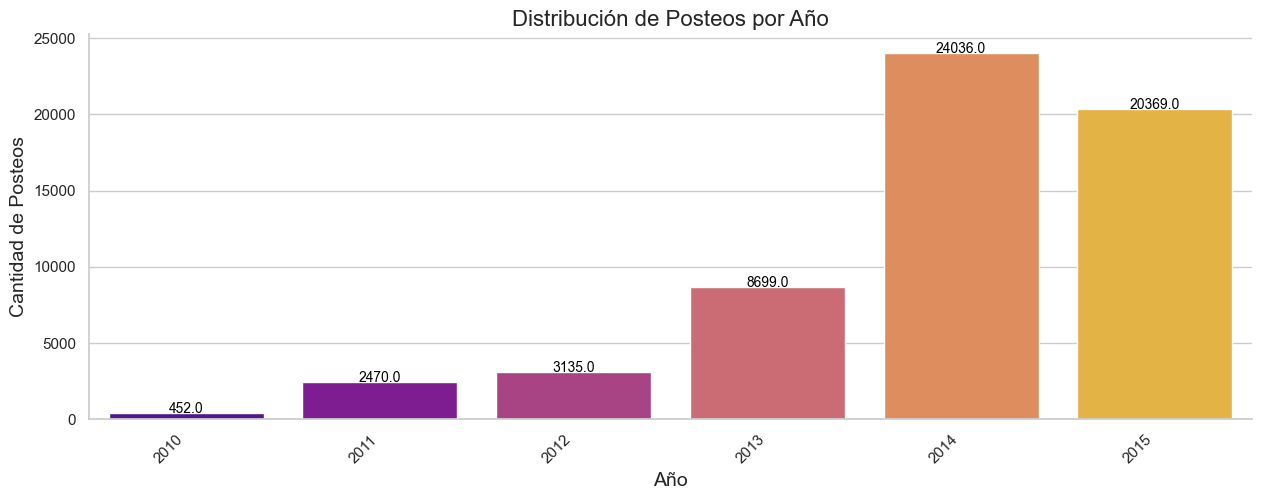

In [22]:
sns.set(style="whitegrid", palette="plasma")

plt.figure(figsize=(15, 5))

ax = sns.countplot(data=df_reviews, x=df_reviews["posted_year"], palette="plasma")  # Agrega una coma aquí

ax.set_title('Distribución de Posteos por Año', fontsize=16)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Cantidad de Posteos', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

sns.despine()
plt.show()

Se obserava: 
La cantidad de posteo es la suma desde el 2010 hasta el 2015 el total es: 59161
Año con mayor posteo: 2014
La diferencia de posteos entre el 2014 y 2015 es de: 3667

EDA user_items.parquet

Extraigo el Dataset realizado en el ETL 

In [23]:
df_items = pd.read_parquet("Data/users_items.parquet")
df_items.head(2)

,item_id,item_name,steam_id,items_count,user_id,playtime_hours
0,10,Counter-Strike,76561197970982479,277,76561197970982479,0.10
1,30,Day of Defeat,76561197970982479,277,76561197970982479,0.12


In [24]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3246375 entries, 0 to 3246374
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   item_id         int64  
 1   item_name       object 
 2   steam_id        int64  
 3   items_count     int64  
 4   user_id         object 
 5   playtime_hours  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 148.6+ MB


In [25]:
df_items.isnull().sum()

item_id           0
item_name         0
steam_id          0
items_count       0
user_id           0
playtime_hours    0
dtype: int64

Variables categoricás 

In [26]:
cant_juegos = len(df_items["item_name"].unique()) # obtenemos la cantidad de software único presente en Steam
cant_juegos

10024

In [27]:
juego = df_items["item_name"].value_counts() # obtenemos la cantidad de juegos por nombre
juego

Counter-Strike: Global Offensive    42842
Garry's Mod                         41639
Left 4 Dead 2                       34535
Unturned                            34089
Terraria                            28244
                                    ...  
Castles                                 1
The Empty Inn                           1
Dr. Bulbaceous                          1
Cue Club 2                              1
Arachnophobia                           1
Name: item_name, Length: 10024, dtype: int64

Observamos: 
La cantidad de software únicas en steam:10947
El software mas consumido es Dota 2 test

Variables númericas 
item_count
playtime_forever

In [28]:
items_count = df_items.groupby('user_id')['items_count'].unique().explode() # obtenemos la cantidad de juegos por usuario
items_count= pd.DataFrame(items_count) # convertimos a dataframe
items_count_user = items_count.sort_values('items_count', ascending=False) # ordenamos de mayor a menor
items_count_user

,items_count
user_id,
phrostb,7762
thugnificent,6700
chidvd,6410
piepai,6132
mayshowganmore,5027
...,...
76561198072737788,1
76561198069543256,1
76561198063914266,1


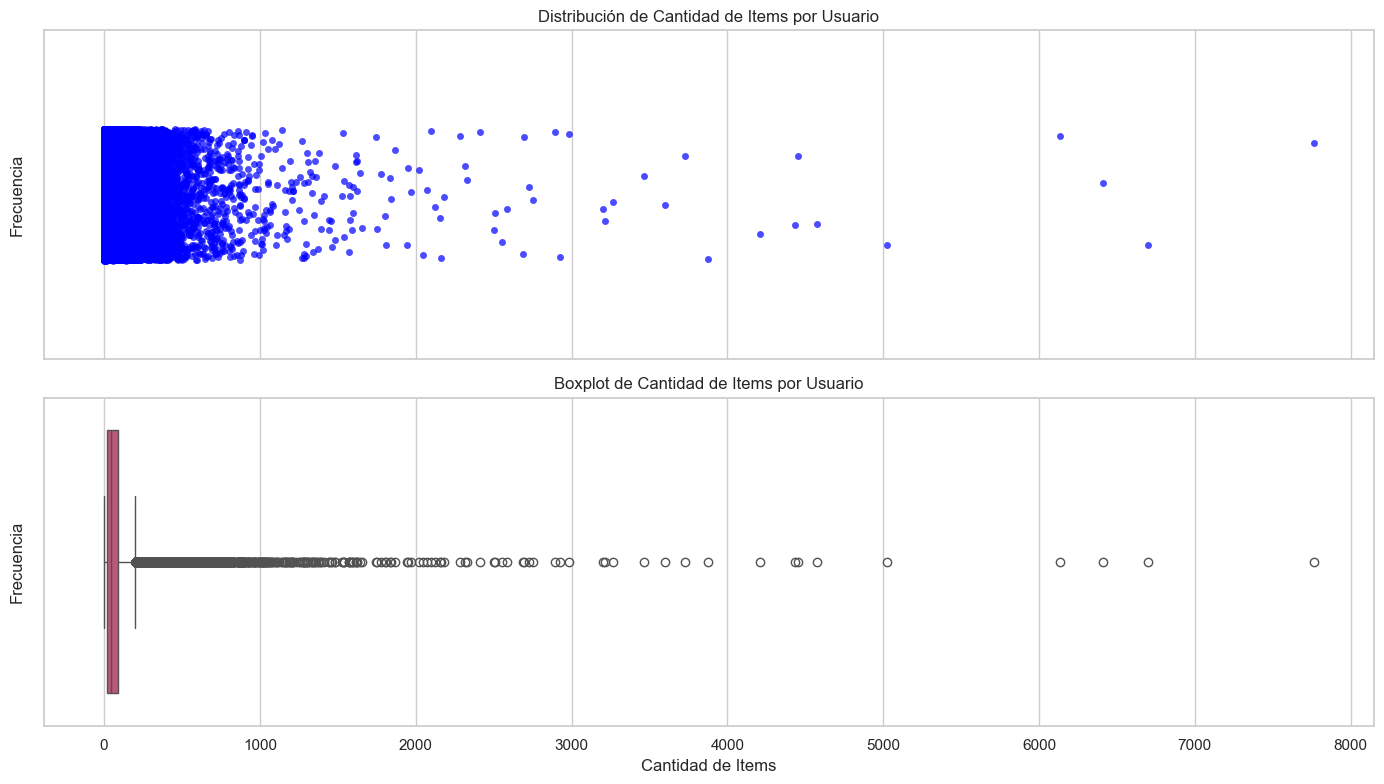

In [29]:
sns.set(style="whitegrid", palette="plasma")

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Subplot 1 - Stripplot
sns.stripplot(data=items_count_user, x='items_count', ax=axes[0], color="blue", jitter=0.2, alpha=0.7)
axes[0].set_xlabel('Cantidad de Items')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Cantidad de Items por Usuario')

# Subplot 2 - Boxplot
sns.boxplot(data=items_count_user, x='items_count', ax=axes[1], palette="plasma")
axes[1].set_xlabel('Cantidad de Items')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Boxplot de Cantidad de Items por Usuario')

plt.tight_layout()
plt.show()

In [30]:
items_count_user.describe()

,items_count
count,68403
unique,924
top,2
freq,1545


Observamos: 
La cantidad de productos consumidos es de: 70912
user_id phrostb:	7762

In [ ]:
items_count.describe()

In [59]:
print(df_items.columns)

Index(['item_id', 'item_name', 'steam_id', 'items_count', 'user_id',
       'playtime_hours'],
      dtype='object')


In [60]:
time_count = df_items.groupby('user_id')['playtime_hours'].unique().explode()  # Obtenemos el tiempo de juego por usuario
time_count = pd.DataFrame(time_count)  # Convertimos a DataFrame
time_count['playtime_hours '] = time_count['playtime_hours']
time_count_user = time_count.sort_values('playtime_hours ', ascending=False)  # Ordenamos de mayor a menor
time_count_user

,playtime_hours,playtime_hours
user_id,,
wolop,10712.88,10712.88
Evilutional,10588.25,10588.25
76561198019826668,10540.87,10540.87
76561198039832932,10223.52,10223.52
tsunamitad,10001.13,10001.13
...,...,...
76561198078062945,0.02,0.02
76561198101995099,0.02,0.02
76561198066935199,0.02,0.02


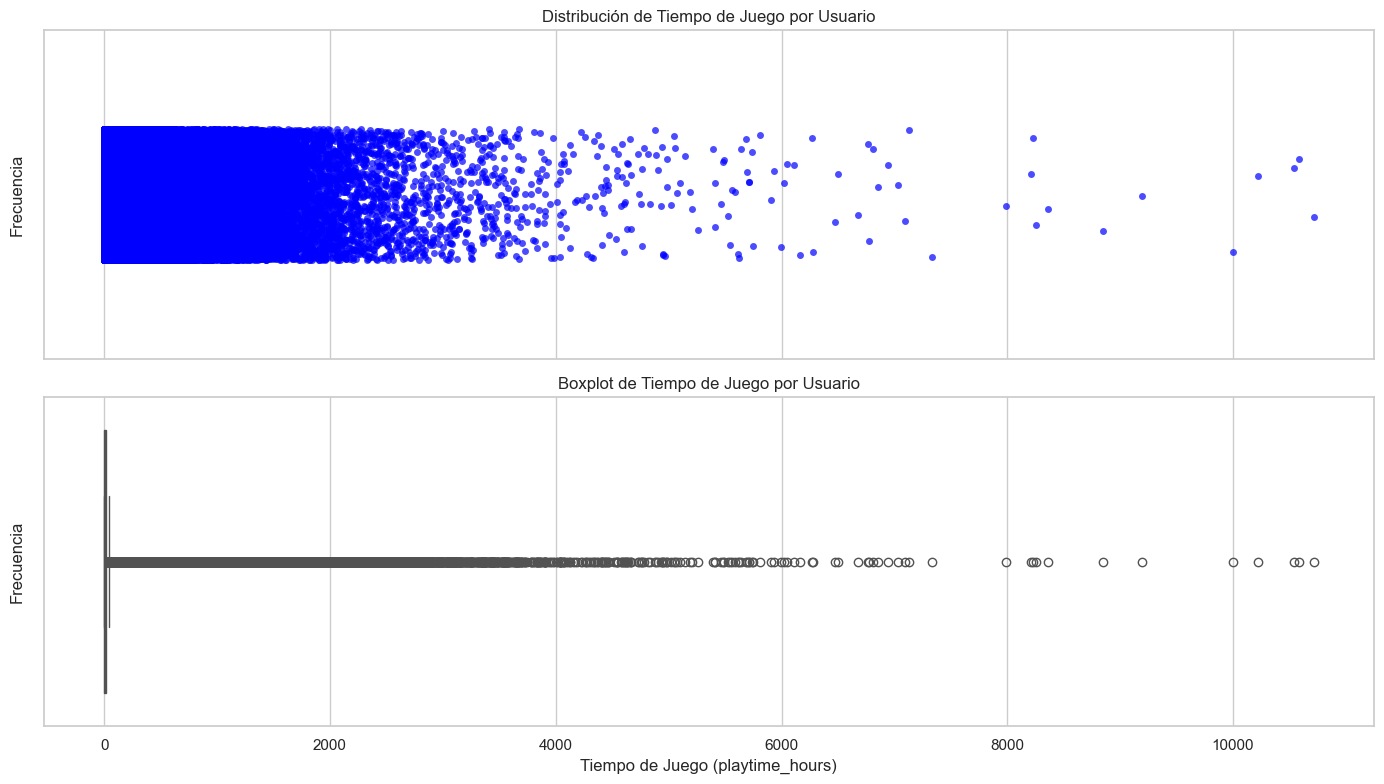

In [61]:
sns.set(style="whitegrid", palette="plasma")

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Subplot 1 - Stripplot
sns.stripplot(data=time_count_user, x='playtime_hours', ax=axes[0], color="blue", jitter=0.2, alpha=0.7)
axes[0].set_xlabel('Tiempo de Juego (playtime_hours)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Tiempo de Juego por Usuario')

# Subplot 2 - Boxplot
sns.boxplot(data=time_count_user, x='playtime_hours', ax=axes[1], palette="plasma")
axes[1].set_xlabel('Tiempo de Juego (playtime_hours)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Boxplot de Tiempo de Juego por Usuario')

plt.tight_layout()
plt.show()

Observamos: 
El juego más consumido en user_id es wolop:	642773

Procedemos a preparar los dataset para realizar las funciones de endpoints.

Para las primeras funciones RELLENAR INFORMACION 

In [43]:
df_games = df_steam[df_steam['release_year'].between(2010, 2015, inclusive='both')] # filtramos los juegos lanzados entre 2010 y 2015
df_games.head(2)

,app_name,release_date,price,item_id,developer,release_year,genres_clean
9,Uncanny Islands,2015-04-22 16:49:08.213569024,0.0,768570,Qucheza,2015,Action
34,United Tactics,2015-04-22 16:49:08.213569024,0.0,662570,Zachary M Thomas,2015,Strategy


In [44]:
df_reviews = df_reviews[df_reviews['posted_year'].between(2010, 2015, inclusive='both')] # filtramos los reviews realizados entre 2010 y 2015
df_reviews.head(2)

,user_id,posted,item_id,recommend,posted_year,sentiment_analysis
0,76561197970982479,2011-11-05,1250,True,2011,2
1,76561197970982479,2011-07-15,22200,True,2011,1


In [45]:
# Unimos los DataFrames
df_games_and_reviews = pd.merge(df_games, df_reviews, left_on='item_id', right_on='item_id')

In [46]:
df_games_and_reviews.head(2) # visualizamos el dataframe

,app_name,release_date,price,item_id,developer,release_year,genres_clean,user_id,posted,recommend,posted_year,sentiment_analysis
0,"Pirates, Vikings, and Knights II",2010-02-12 00:00:00.000000000,0.0,17570,Octoshark Studios,2010,Action,76561198010653835,2015-04-07,True,2015,2
1,"Pirates, Vikings, and Knights II",2010-02-12 00:00:00.000000000,0.0,17570,Octoshark Studios,2010,Action,76561198075581042,2014-03-09,True,2014,2


In [47]:
df_games_and_reviews.info() # obtenemos información de las columnas y sus tipos de datos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35085 entries, 0 to 35084
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   app_name            35085 non-null  object 
 1   release_date        35085 non-null  object 
 2   price               35085 non-null  float64
 3   item_id             35085 non-null  int64  
 4   developer           35085 non-null  object 
 5   release_year        35085 non-null  int64  
 6   genres_clean        35085 non-null  object 
 7   user_id             35085 non-null  object 
 8   posted              35085 non-null  object 
 9   recommend           35085 non-null  bool   
 10  posted_year         35085 non-null  int64  
 11  sentiment_analysis  35085 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 3.2+ MB


Creamos el archivo 

In [48]:
df_games_and_reviews.to_csv("Data/games_reviews.csv", index=False, encoding="utf-8") # guardamos el dataframe en un archivo csv

In [49]:
df_games_and_reviews = pd.read_csv("Data/games_reviews.csv") # leemos el archivo csv

tabla = pa.Table.from_pandas(df_games_and_reviews) # convertimos el dataframe en una tabla
pq.write_table(tabla,"Data/games_reviews.parquet") # guardamos la tabla en un archivo parquet

Modelo de Recomendación 

In [50]:
modelo_item = pd.read_parquet("Data/steam_games.parquet")
modelo_item

,app_name,release_date,tags,price,item_id,developer,release_year,genres
0,Lost Summoner Kitty,NaN,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.99,761140,Kotoshiro,NaN,Action
1,Ironbound,NaN,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",0.00,643980,Secret Level SRL,NaN,Free to Play
2,Real Pool 3D - Poolians,NaN,"['Free to Play', 'Simulation', 'Sports', 'Casu...",0.00,670290,Poolians.com,NaN,Casual
3,弹炸人2222,NaN,"['Action', 'Adventure', 'Casual']",0.99,767400,彼岸领域,NaN,Action
4,Battle Royale Trainer,NaN,"['Action', 'Adventure', 'Simulation', 'FPS', '...",3.99,772540,Trickjump Games Ltd,NaN,Action
...,...,...,...,...,...,...,...,...
28894,Kebab it Up!,NaN,"['Action', 'Indie', 'Casual', 'Violent', 'Adve...",1.99,745400,Bidoniera Games,NaN,Action
28895,Colony On Mars,NaN,"['Strategy', 'Indie', 'Casual', 'Simulation']",1.99,773640,"Nikita ""Ghost_RUS""",NaN,Casual
28896,LOGistICAL: South Africa,NaN,"['Strategy', 'Indie', 'Casual']",4.99,733530,Sacada,NaN,Casual
28897,Russian Roads,NaN,"['Indie', 'Simulation', 'Racing']",1.99,610660,Laush Dmitriy Sergeevich,NaN,Indie


Creo un dataframe con:
item_id
app_name
genres_clean

In [52]:
modelo_item = modelo_item[["item_id", "app_name", "genres"]]
modelo_item

,item_id,app_name,genres
0,761140,Lost Summoner Kitty,Action
1,643980,Ironbound,Free to Play
2,670290,Real Pool 3D - Poolians,Casual
3,767400,弹炸人2222,Action
4,772540,Battle Royale Trainer,Action
...,...,...,...
28894,745400,Kebab it Up!,Action
28895,773640,Colony On Mars,Casual
28896,733530,LOGistICAL: South Africa,Casual
28897,610660,Russian Roads,Indie


In [53]:
modelo_item.info() # obtenemos información de las columnas y sus tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28899 entries, 0 to 28898
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   28899 non-null  int64 
 1   app_name  28899 non-null  object
 2   genres    28899 non-null  object
dtypes: int64(1), object(2)
memory usage: 677.4+ KB


Creamos el archivo 

In [54]:
modelo_item = modelo_item.copy() # Creamos una copia del dataframe

In [55]:
modelo_item.to_csv("Data/modelo_item.csv", index=False, encoding='utf-8') # Exportamos el dataframe a csv

In [56]:
modelo_item = pd.read_csv("Data/modelo_item.csv") # leemos el archivo csv

tabla = pa.Table.from_pandas(modelo_item) # convertimos el dataframe en una tabla de pyarrow
pq.write_table(tabla,"Data/modelo_item.parquet") # exportamos la tabla a parquet